In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
df_index= pd.read_csv("economic_index.csv")

In [41]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [42]:
## Drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', "year", "month"], axis = 1, inplace=True)

In [43]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [44]:
## Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

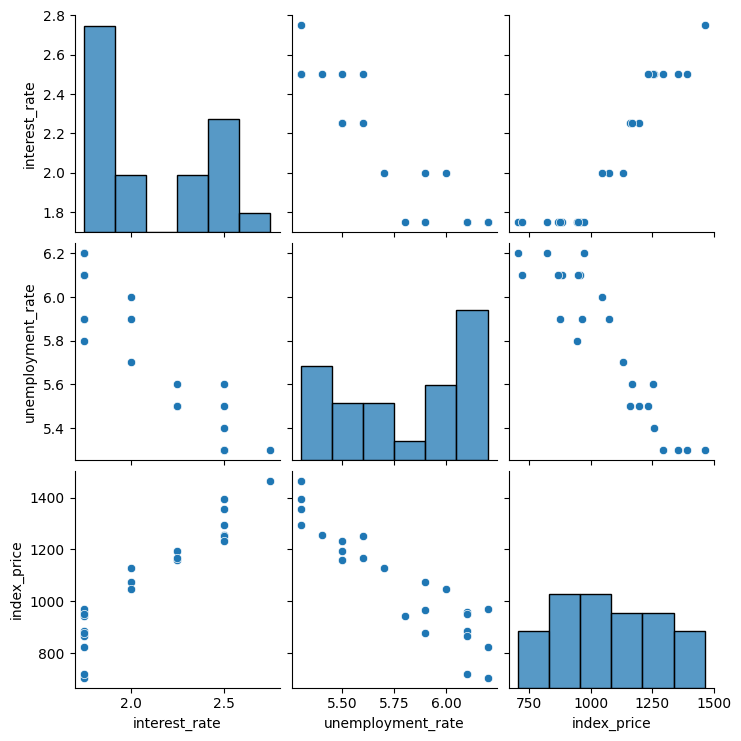

In [45]:
## Lets do Visualization
import seaborn as sns
sns.pairplot(df_index)

In [46]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


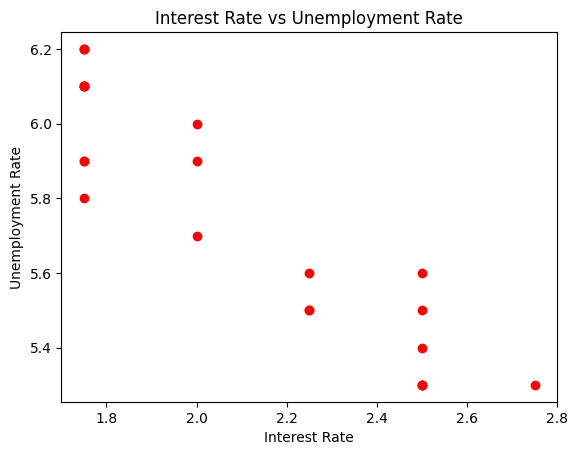

In [47]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show() 

In [48]:
## Independent and dependent features
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [49]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [71]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)    


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

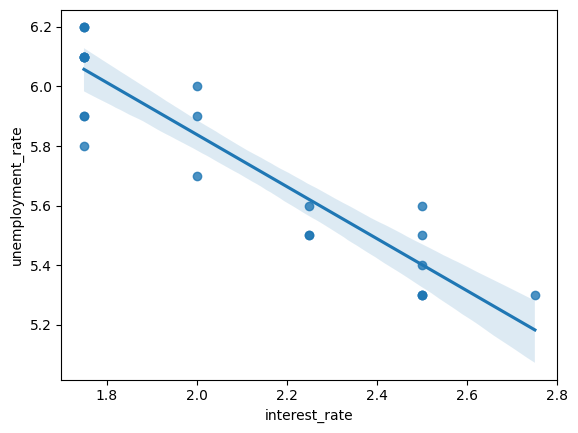

In [72]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [76]:
X_train

array([[-1.01512945,  0.39413171],
       [-1.01512945,  0.98532928],
       [-1.01512945,  1.28092806],
       [ 0.3904344 , -0.78826342],
       [ 1.09321633, -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.08386221],
       [ 1.09321633, -1.37946099],
       [ 1.09321633, -0.49266464],
       [-1.01512945,  0.98532928],
       [ 0.3904344 , -0.49266464],
       [ 0.3904344 , -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.37946099],
       [ 1.79599826, -1.37946099],
       [-1.01512945,  1.28092806],
       [-1.01512945,  0.98532928],
       [-0.31234752,  0.68973049]])

In [77]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [78]:
regression.fit(X_train, y_train)

LinearRegression()

In [79]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)    

In [80]:
np.mean(validation_score)

-3863.3935674824306

In [81]:
## Predictions
y_pred = regression.predict(X_test)

In [82]:
y_pred

array([1089.17624198, 1127.99283867,  899.44410498,  977.07729837,
        957.66900002, 1468.64051598])

In [83]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

In [84]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)  
print(rmse)  


8634.281192947814
67.00238710853853
92.92083293292099
